In [37]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [38]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [39]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [40]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m)))
    w_ = ss @ X.T @ Y * (1 / var)
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [41]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.007447311594780785


In [42]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


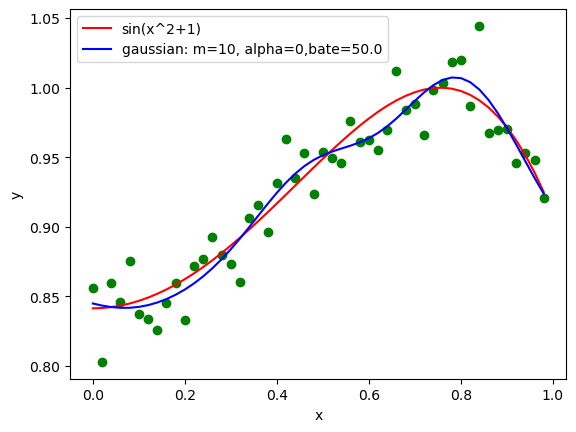

w:  [ 8.67238910e-01 -3.81190660e-02  2.70665912e-02 -2.61067495e-02
 -3.80949574e-04  1.11159752e-01 -5.10655328e-02  1.59356946e-02
  1.41111345e-01 -8.69272870e-03]


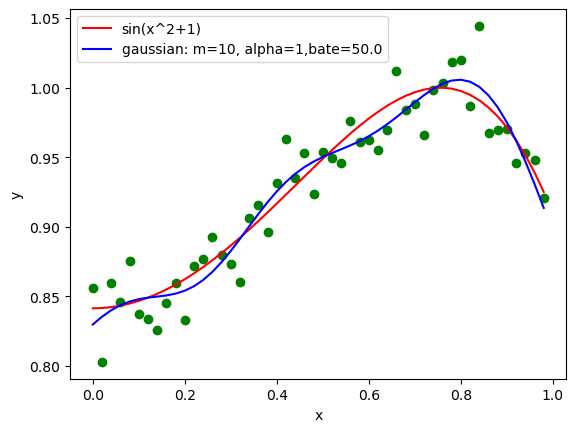

w:  [ 0.76186144  0.10726295 -0.05752773  0.037829    0.08451359  0.04581786
  0.04098283  0.06942817  0.06685541  0.13020172]


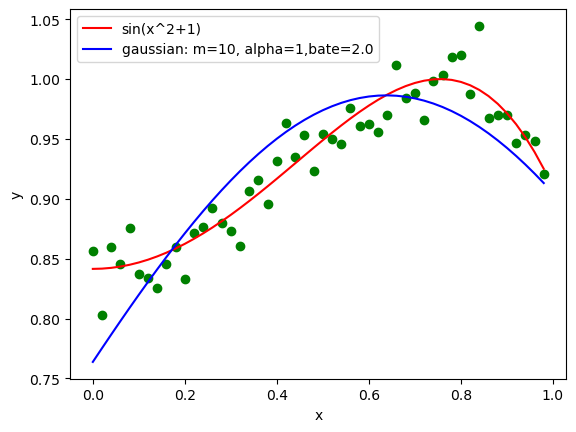

w:  [0.25054683 0.04227484 0.04092738 0.04518276 0.05552204 0.07173452
 0.09290443 0.11749663 0.14353042 0.16881508]


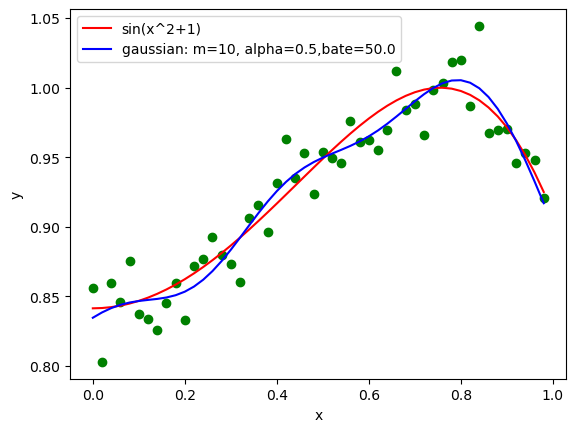

w:  [ 0.78488627  0.08305549 -0.05383005  0.03377102  0.06988405  0.04800378
  0.02765789  0.06256755  0.0730405   0.10545963]


In [43]:
params = [(0.02, 0), (0.02, 1), (0.5, 1), (0.02, 0.5)]

for var_el, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



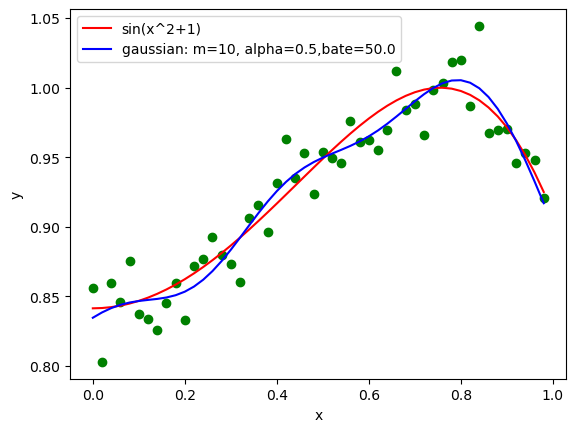

w:  [ 0.78488627  0.08305549 -0.05383005  0.03377102  0.06988405  0.04800378
  0.02765789  0.06256755  0.0730405   0.10545963]


In [44]:
param = [(0.02, 0.5)]
for var_el, al in param:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)

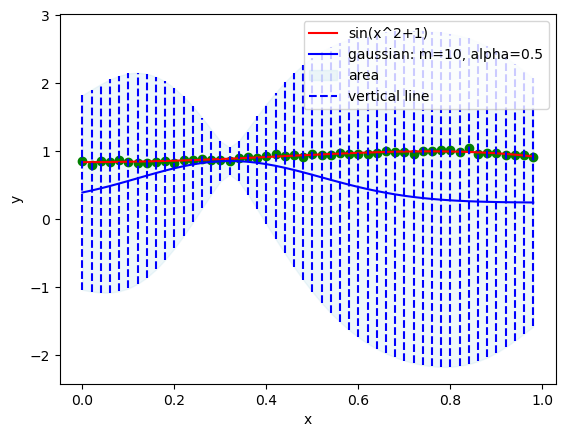

[16]
1


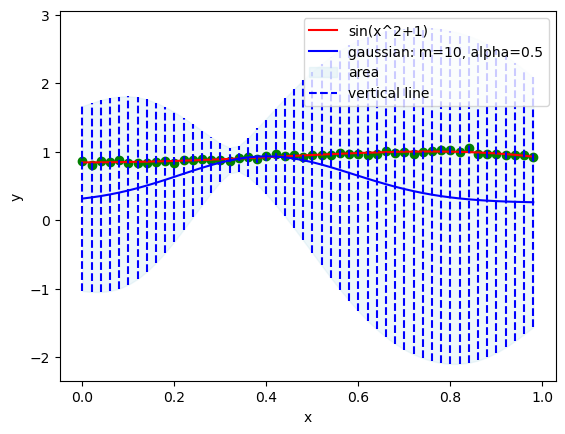

[16, 17]
2


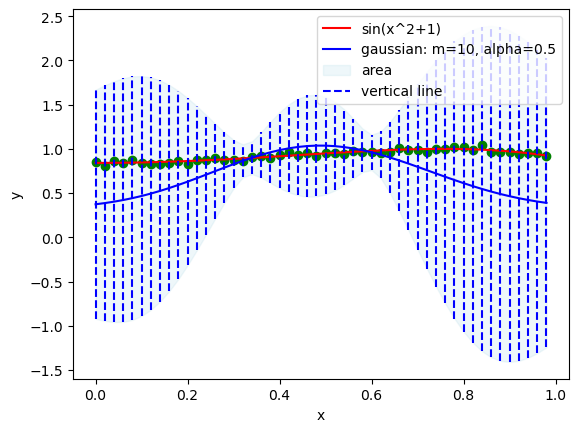

[16, 17, 30]
3


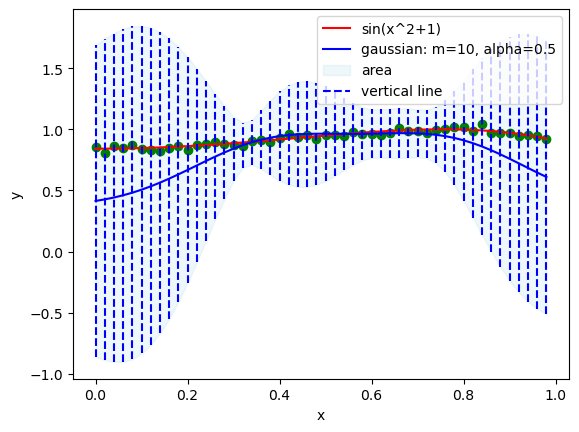

[16, 17, 30, 36]
4


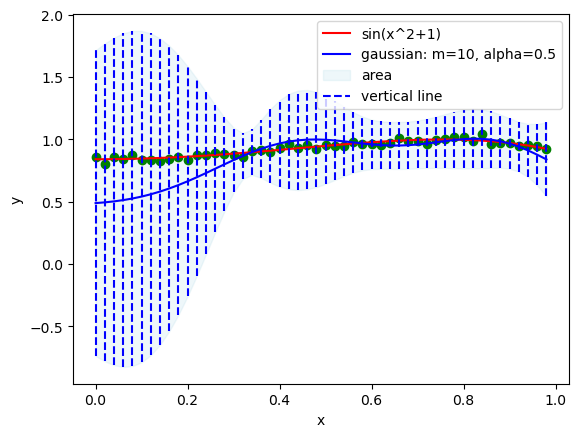

[16, 17, 30, 36, 46]
5


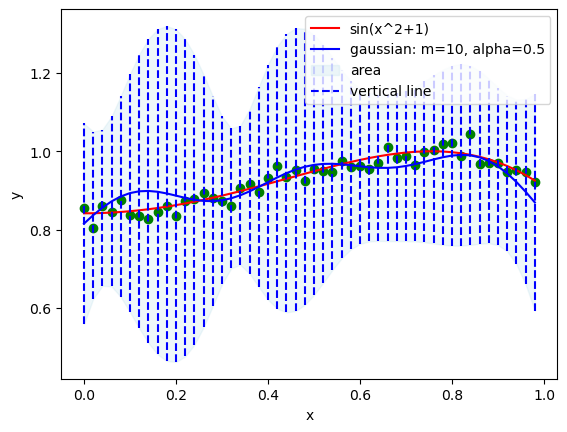

[16, 17, 30, 36, 46, 2]
6


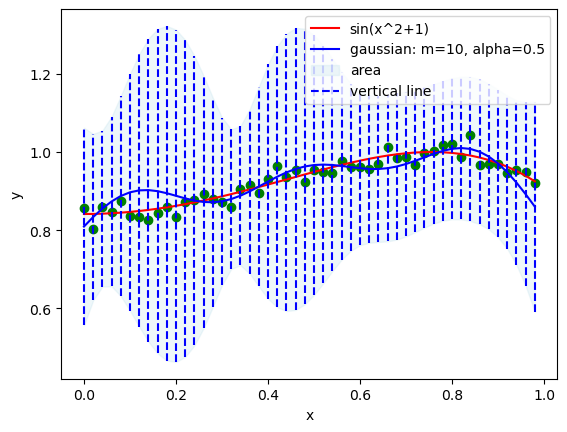

[16, 17, 30, 36, 46, 2, 40]
7


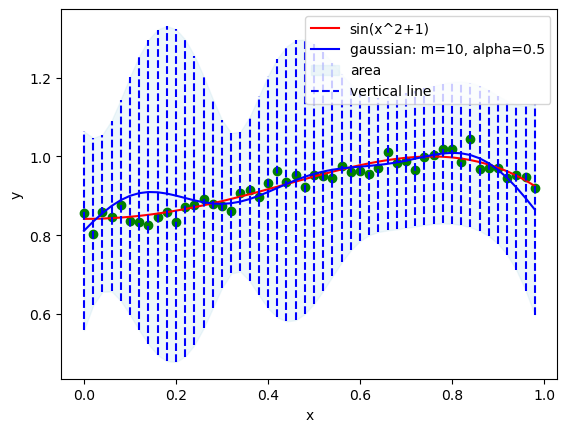

[16, 17, 30, 36, 46, 2, 40, 33]
8


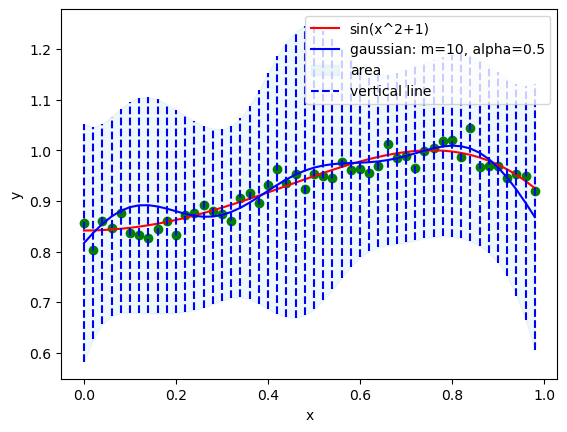

[16, 17, 30, 36, 46, 2, 40, 33, 11]
9


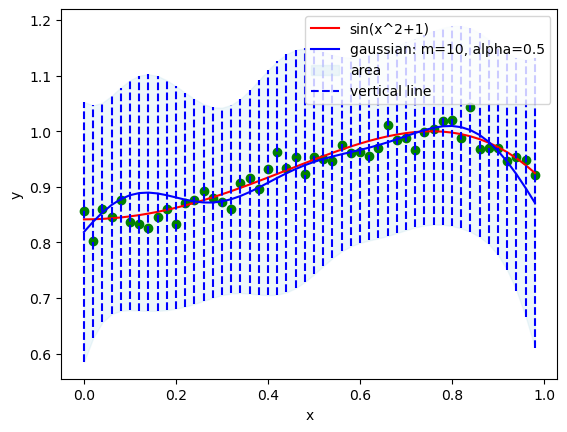

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27]
10


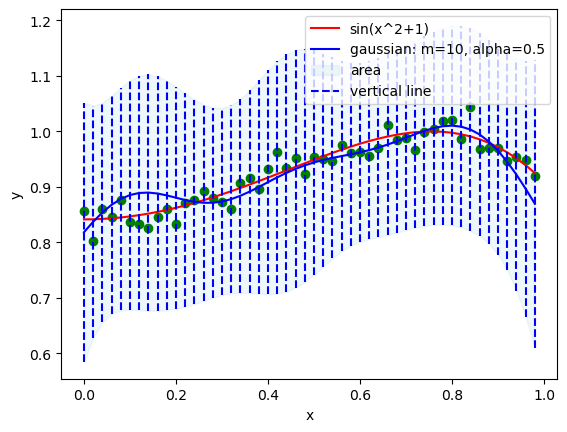

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31]
11


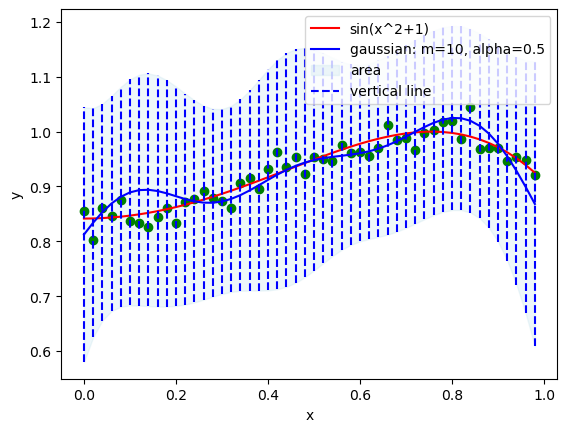

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42]
12


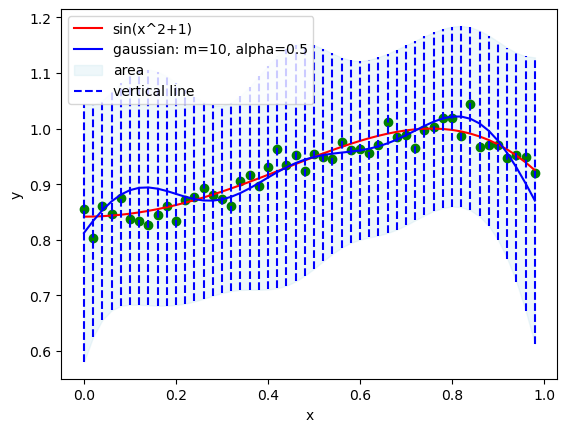

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38]
13


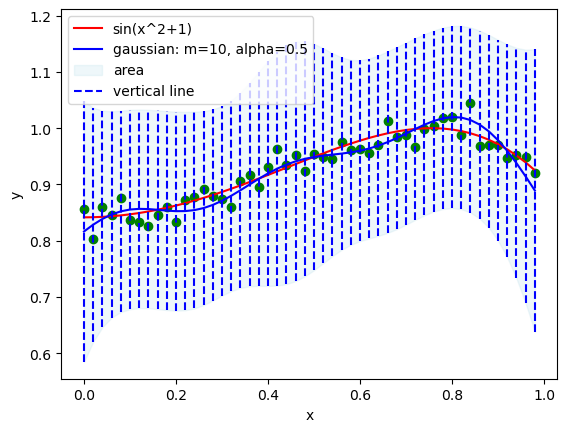

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7]
14


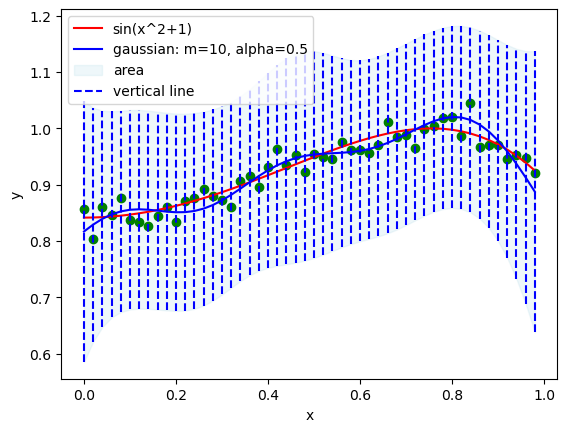

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20]
15


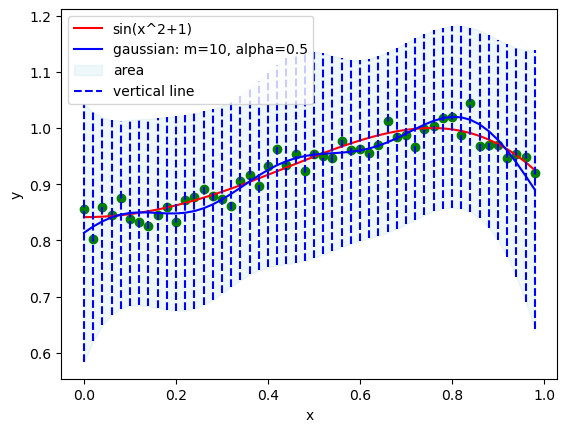

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5]
16


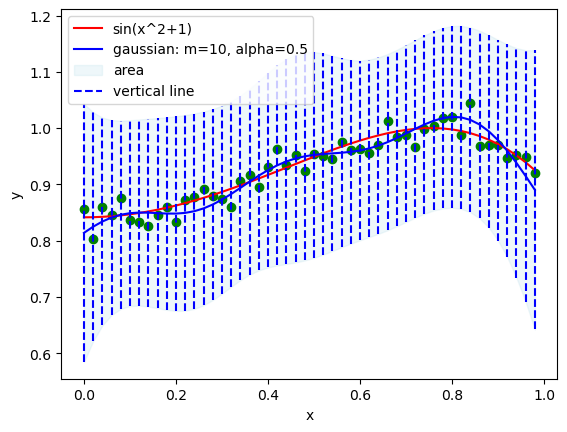

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34]
17


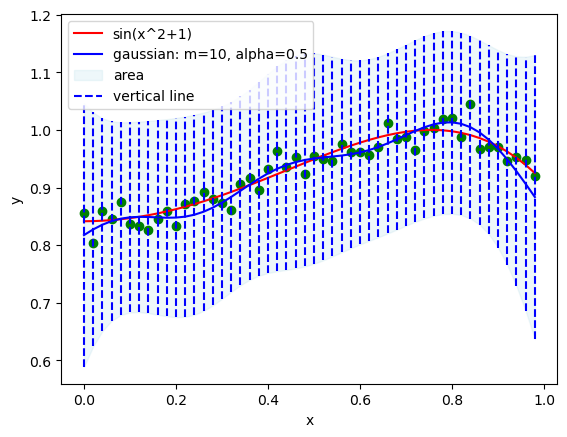

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43]
18


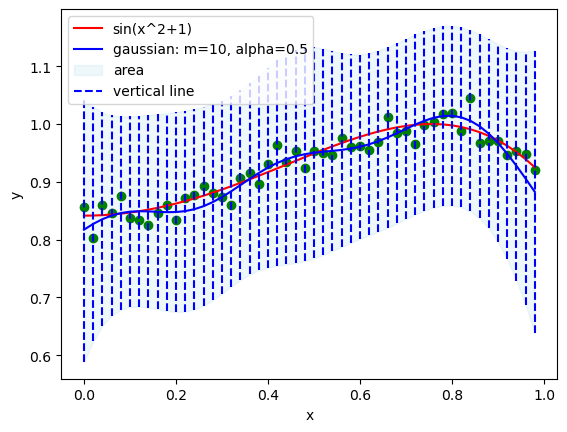

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39]
19


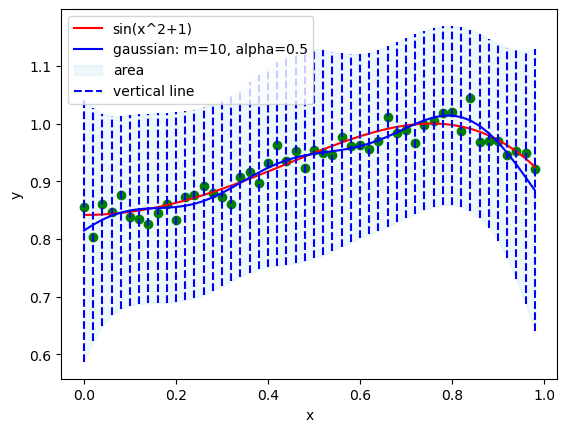

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12]
20


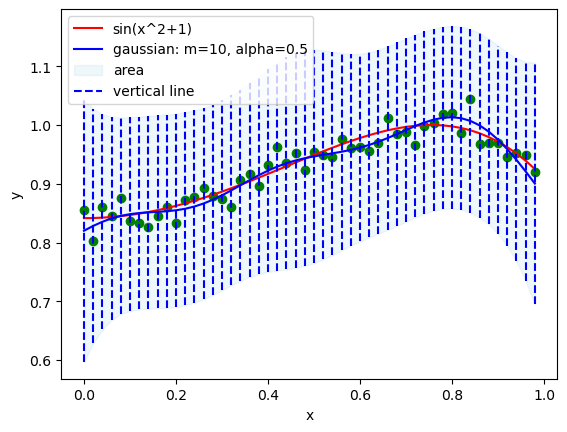

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47]
21


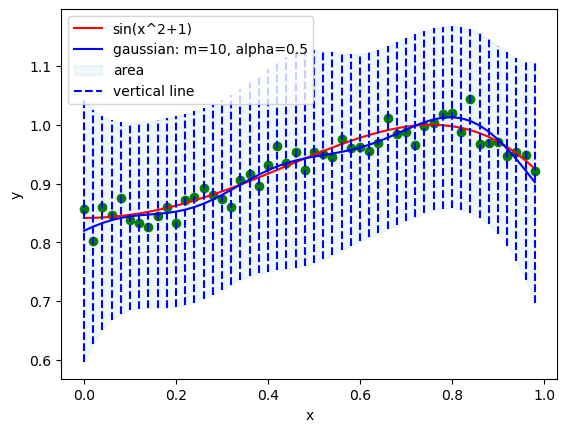

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6]
22


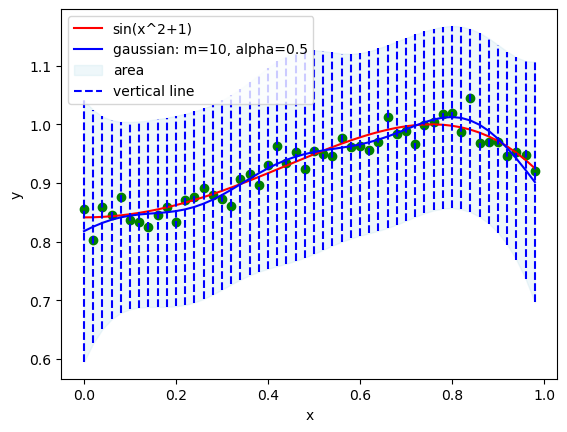

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28]
23


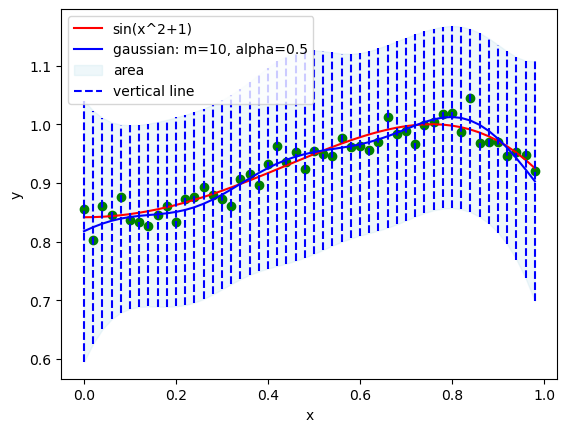

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6]
24


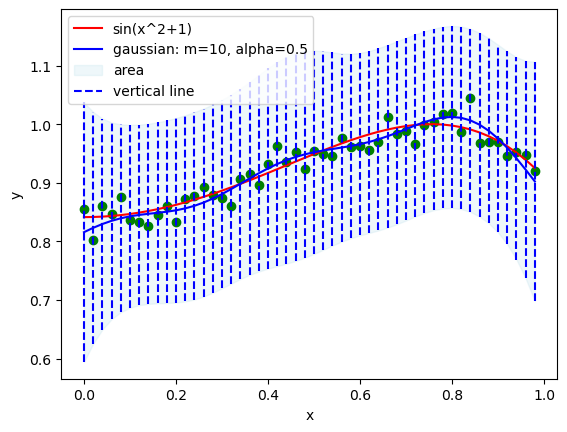

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9]
25


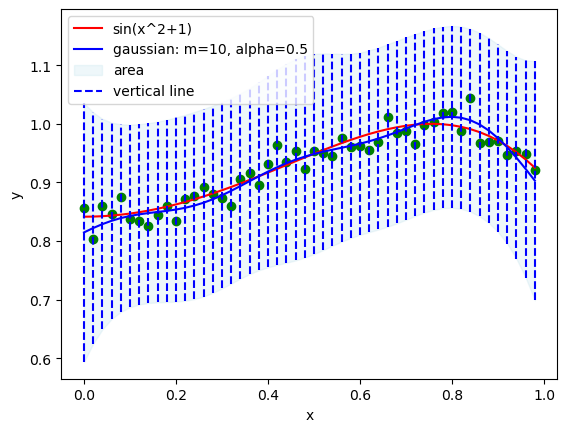

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19]
26


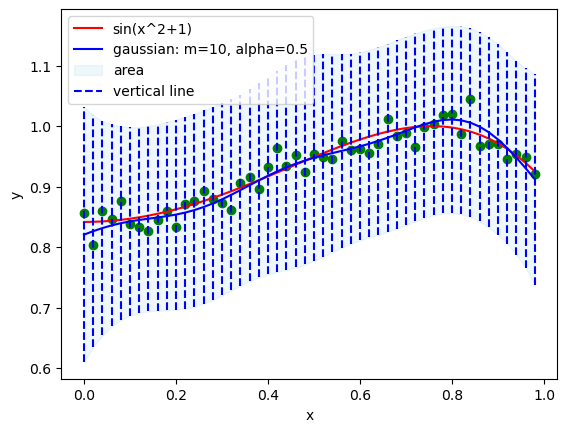

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49]
27


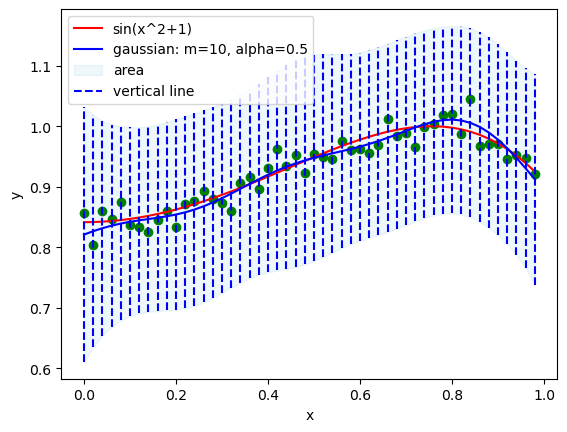

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17]
28


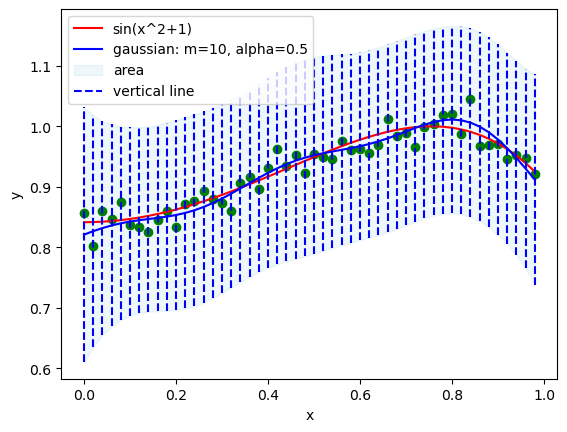

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23]
29


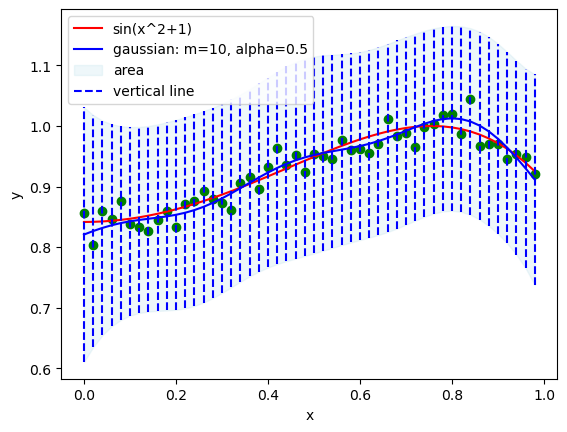

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40]
30


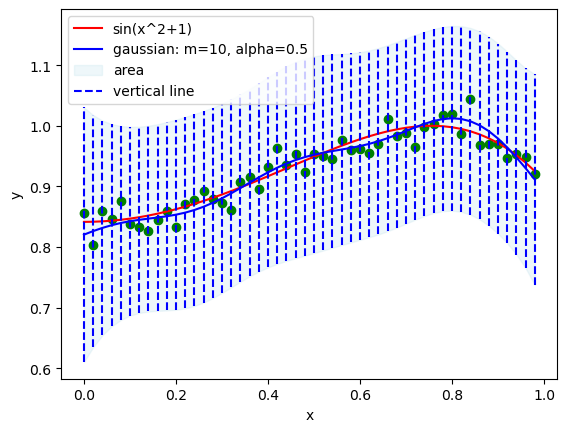

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35]
31


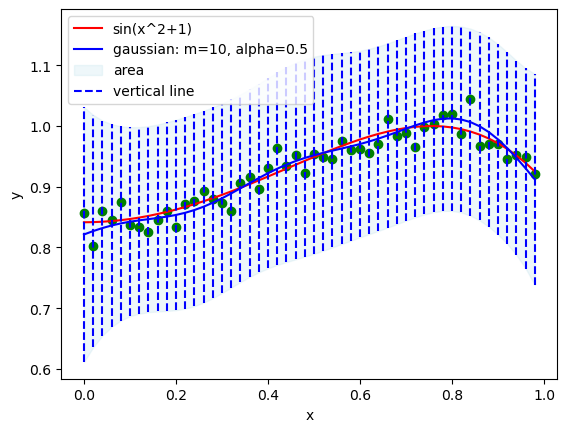

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33]
32


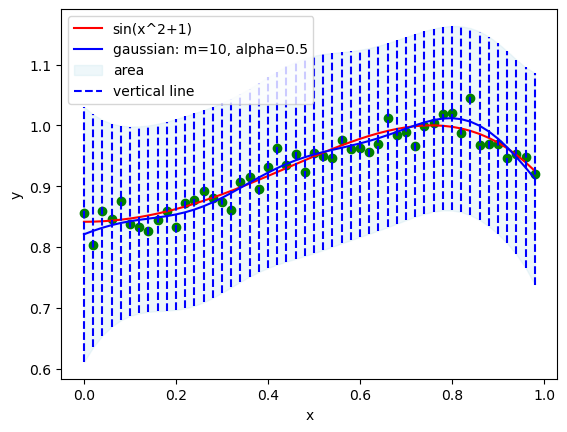

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37]
33


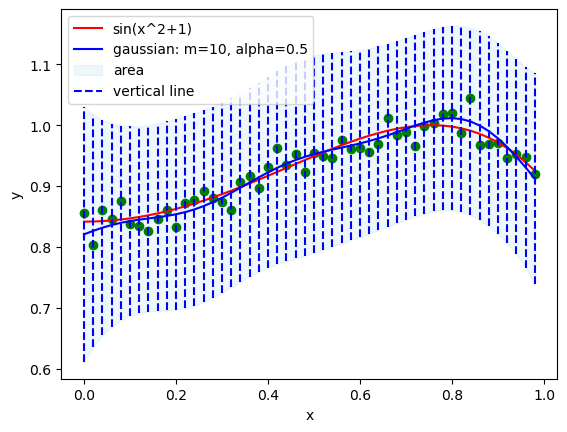

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35]
34


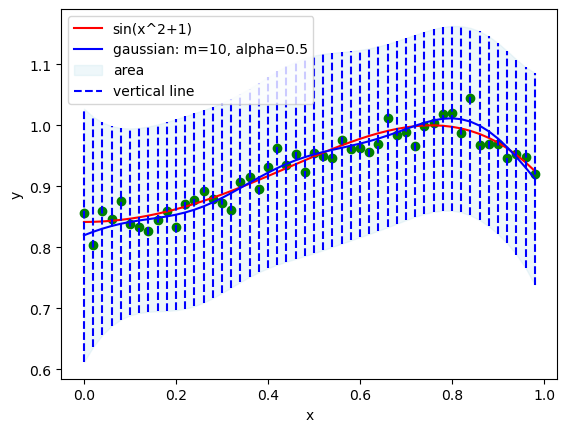

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5]
35


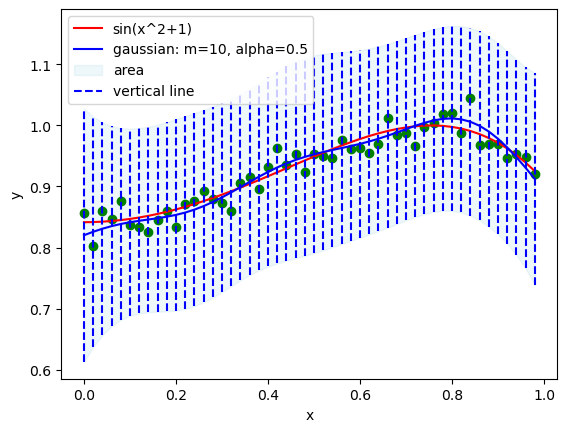

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18]
36


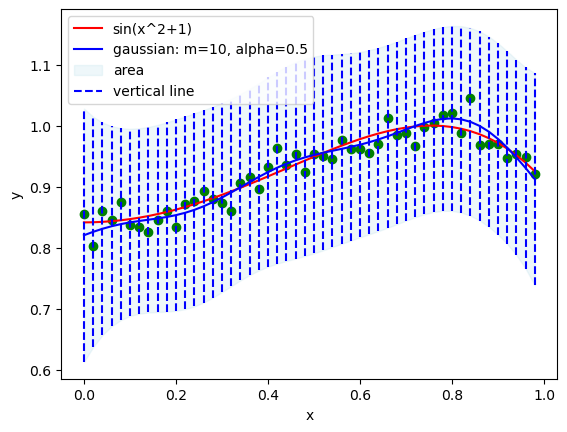

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30]
37


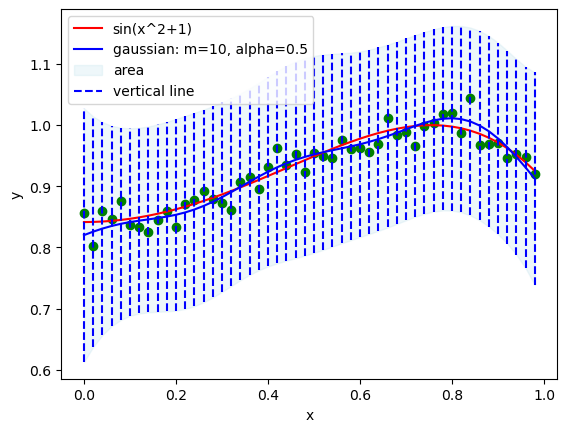

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37]
38


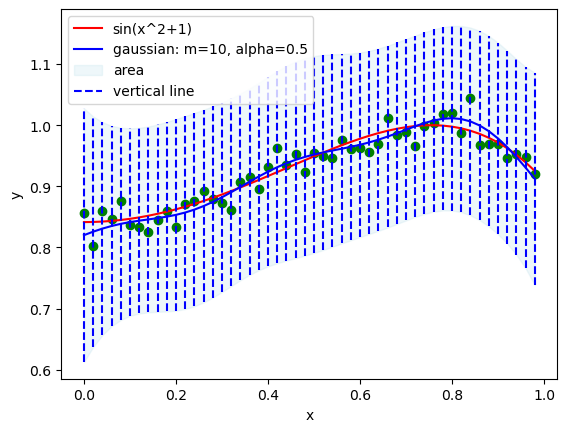

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32]
39


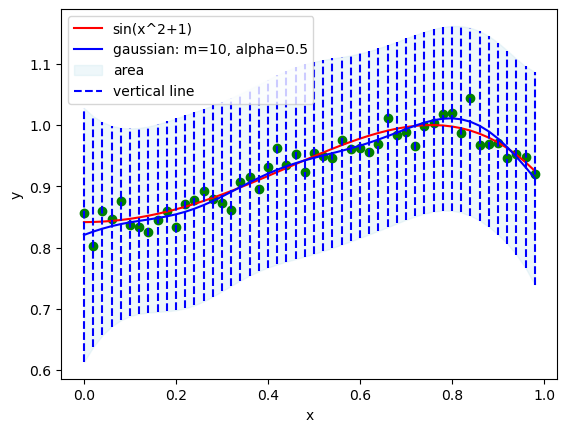

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24]
40


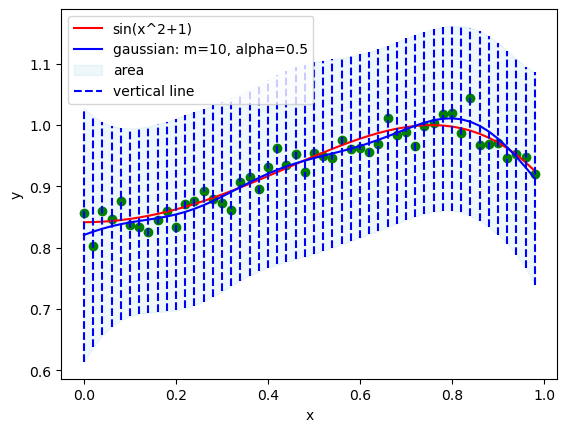

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24, 30]
41


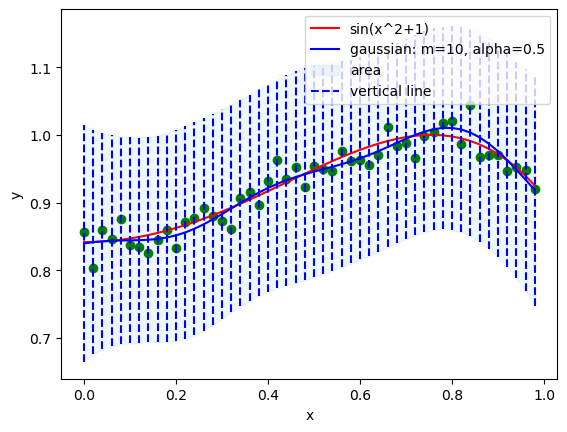

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24, 30, 0]
42


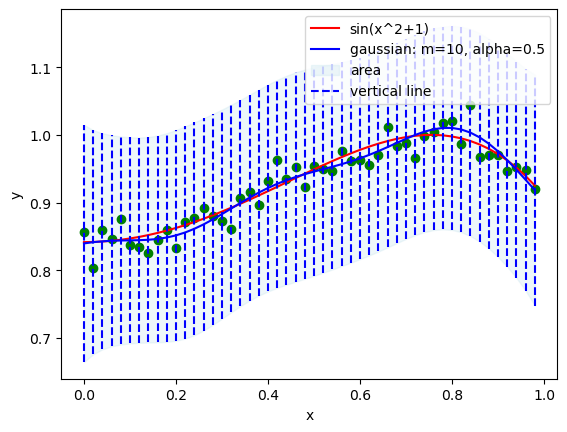

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24, 30, 0, 26]
43


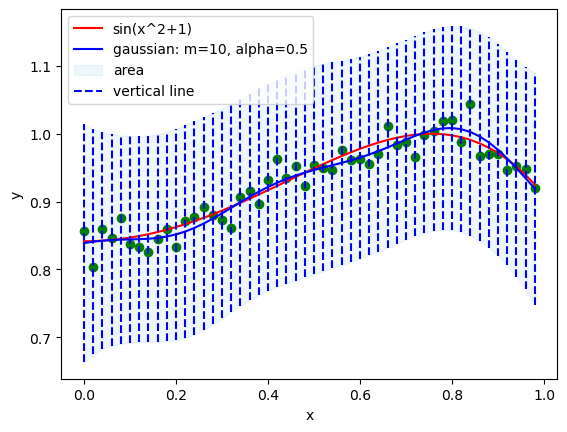

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24, 30, 0, 26, 36]
44


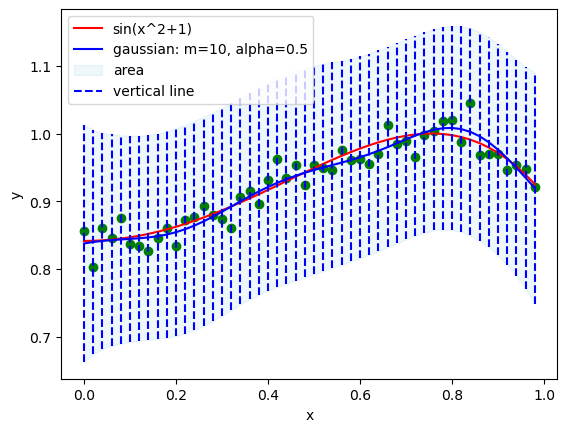

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24, 30, 0, 26, 36, 11]
45


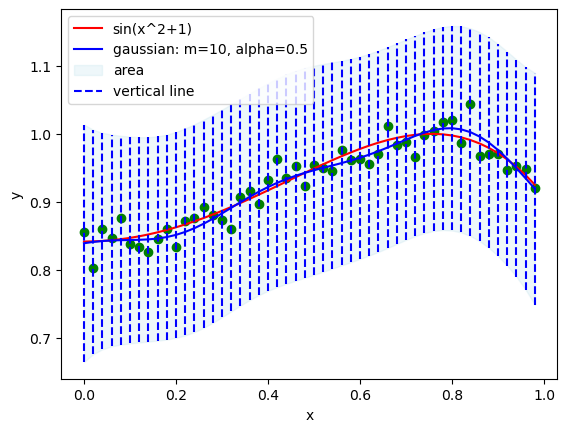

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24, 30, 0, 26, 36, 11, 10]
46


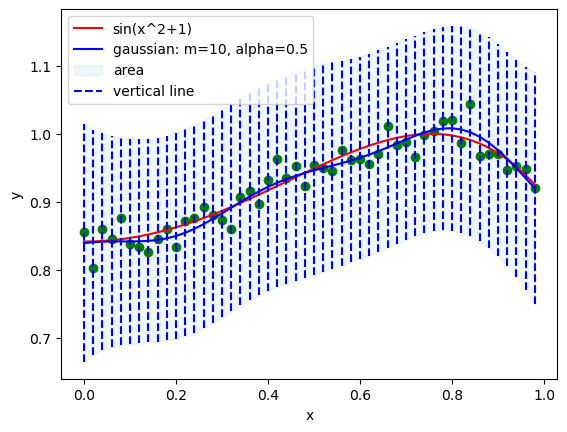

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24, 30, 0, 26, 36, 11, 10, 7]
47


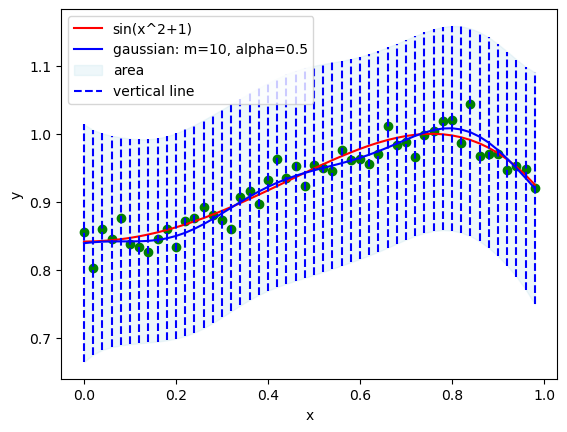

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24, 30, 0, 26, 36, 11, 10, 7, 34]
48


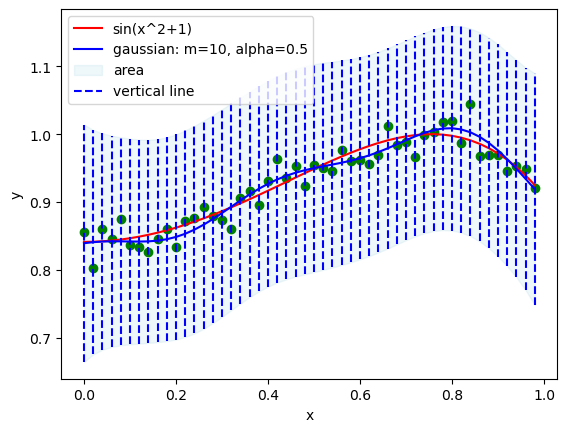

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24, 30, 0, 26, 36, 11, 10, 7, 34, 21]
49


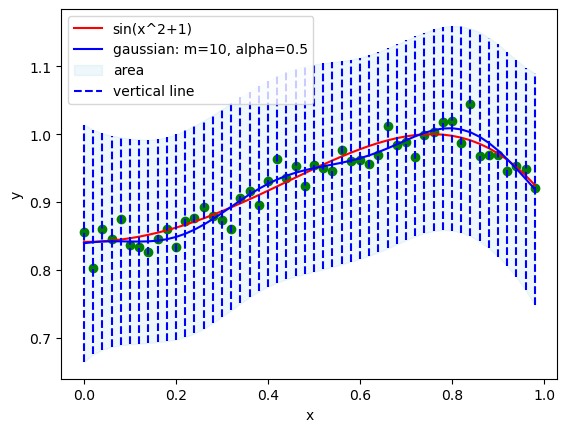

[16, 17, 30, 36, 46, 2, 40, 33, 11, 27, 31, 42, 38, 7, 20, 5, 34, 43, 39, 12, 47, 6, 28, 6, 9, 19, 49, 17, 23, 40, 35, 33, 37, 35, 5, 18, 30, 37, 32, 24, 30, 0, 26, 36, 11, 10, 7, 34, 21, 29]
50


In [45]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


i_arr = []

# x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(var + el.T @ ss @ el)

    display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)
